try to re-train another model from scratch to check whether similar discreteness still appears

### make model 1 & re-train

In [305]:
mdy0_1 = BSModel(inp_size, hidden_size, output_size)

In [306]:
optimizer_1 = optim.SGD(mdy0_1.parameters(), lr=0.01)

#### train & test

In [307]:
loss_hist_m1y0_0 = trn_epoches(1000, mdy0_1,loss_fn, train_dataloader_0,optimizer_1)

epoch      0/  1000, loss: 11242.893555
epoch    200/  1000, loss: 4181.407715
epoch    400/  1000, loss: 4711.713867
epoch    600/  1000, loss: 4831.187500
epoch    800/  1000, loss: 4560.086914


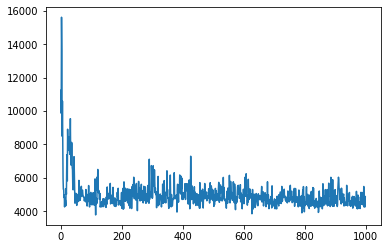

In [308]:
plt.plot(loss_hist_m1y0_0)

In [309]:
pred_m1y0_train_0 = test_loop(mdy0_1, train_x, train_y0, loss_fn)

loss: 9669.030273 



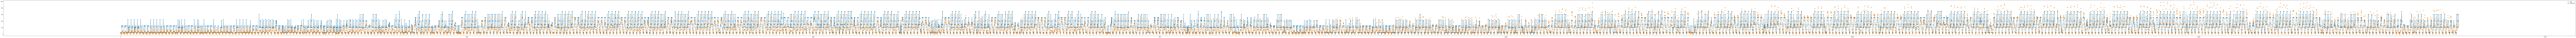

In [310]:
plt.figure(figsize = (500, 7))
pred_data = pred_m1y0_train_0.numpy()
pred_plot, = plt.plot(pred_data, 'o-')
cnt_plot, = plt.plot(train_y0, 'o')
plt.legend([cnt_plot, pred_plot],['data', 'Prediction'])
plt.show()

In [311]:
pred_m1y0_test_0 = test_loop(mdy0_1, test_x, test_y0, loss_fn)

loss: 6948.685059 



prediction vs target, test data

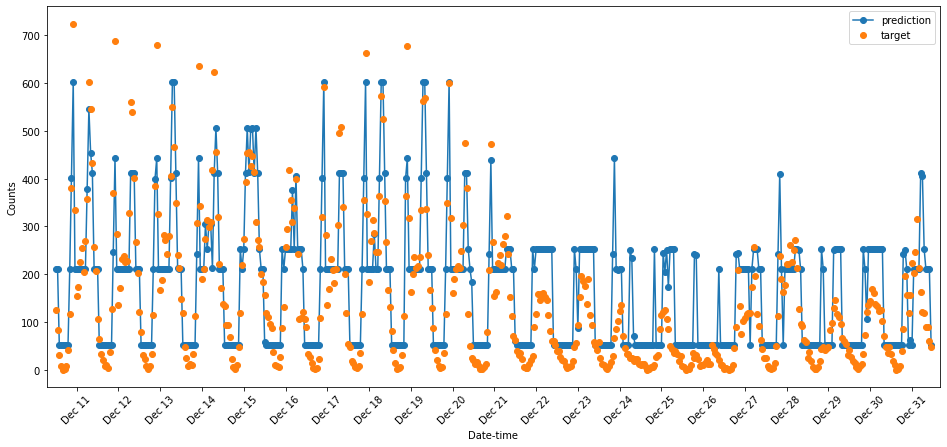

In [312]:
fig, ax = plt.subplots(figsize = (16, 7))

ax.plot(pred_m1y0_test_0, 'o-', label='prediction')
ax.plot(tgt_data_test, 'o', label='target')
ax.legend()
ax.set_xlabel('Date-time')
ax.set_ylabel('Counts')

dates = pd.to_datetime(df1.loc[df_inp[-21*24:].index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.margins(x=0.01)
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)

still discrete.

In [315]:
dict_y01 = dict(mdy0_1.named_parameters())

In [316]:
dict_y01.keys()

dict_keys(['stack.0.weight', 'stack.0.bias', 'stack.2.weight', 'stack.2.bias'])

In [317]:
dict_y01['stack.0.bias']

Parameter containing:
tensor([ -38.4627, -160.7807,  -20.4367,  -19.5354,  -17.9153,  -44.2041,
         -53.4498,   -9.7021,  -81.1548,  -26.2099], requires_grad=True)

plot the output of the hidden layer to understand the cause of the discreteness.

In [318]:
h_rslt_1 = hidden_out(test_x,mdy0_1)

In [321]:
h_rslt_1.size()

torch.Size([504, 10])

In [324]:
predar_m1y0_test= pred_m1y0_test_0.numpy()

ouptut of the hidden layers & normalized prediction & target curves.

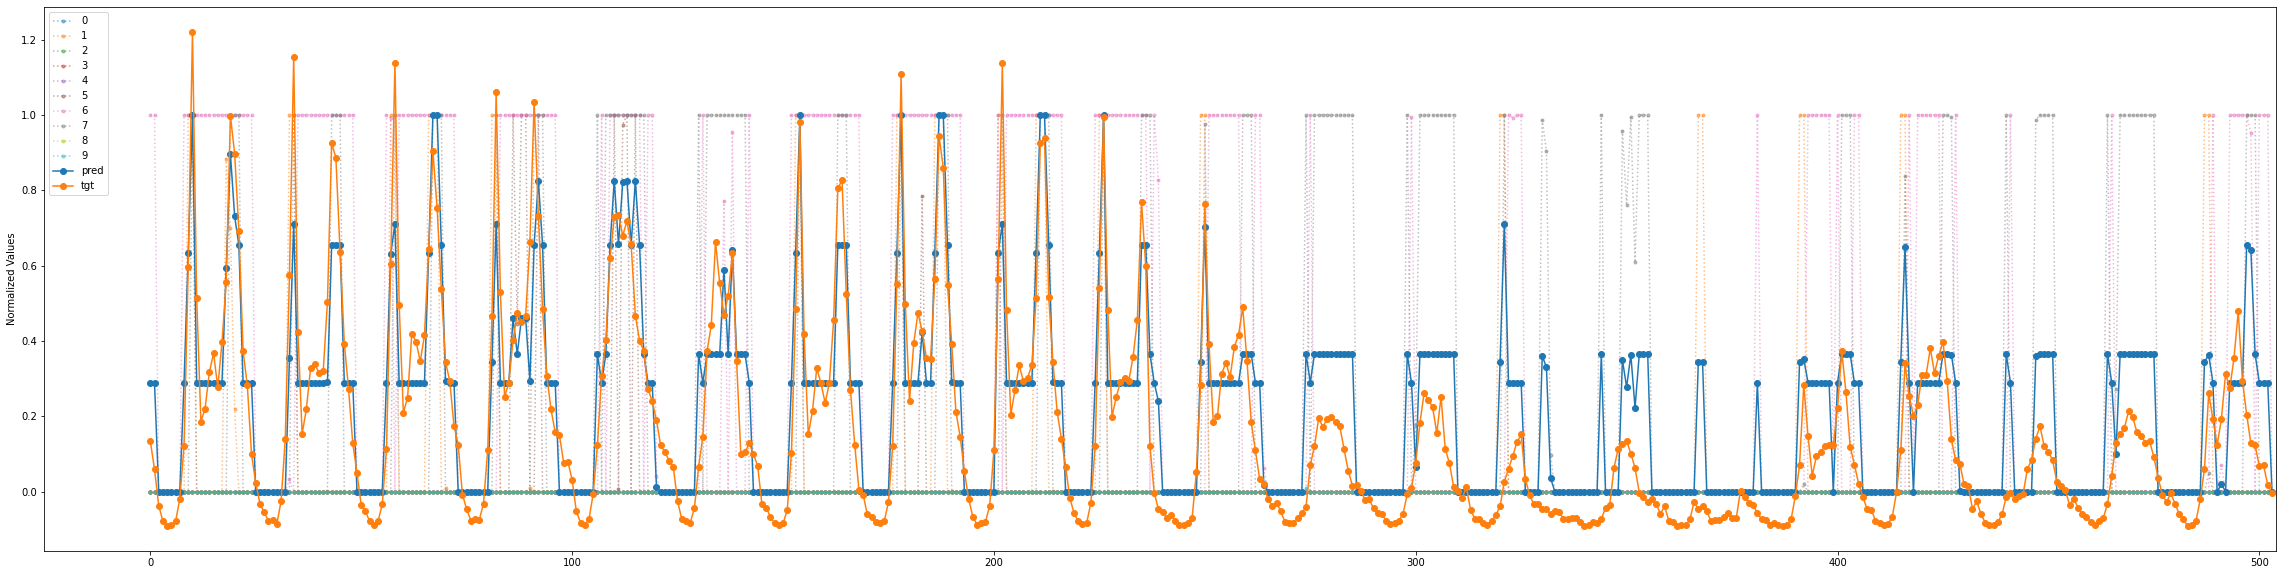

In [326]:
fig, ax = plt.subplots(figsize = (40, 10))
for i in range(10):
    ax.plot(h_rslt_1[:,i], '.:', alpha = 0.5, label = i)

ax.plot((predar_m1y0_test - min(predar_m1y0_test))/(max(predar_m1y0_test)-min(predar_m1y0_test)),'o-',label='pred')
ax.plot((tgt_data_test - min(predar_m1y0_test))/(max(predar_m1y0_test)-min(predar_m1y0_test)),'o-',label='tgt')    
ax.set_xlim(right=len(predar_m1y0_test))
ax.legend()

plt.ylabel('Normalized Values')
plt.show()

ouptut of the hidden layers & normalized prediction & target curves.

Text(0, 0.5, 'tgt')

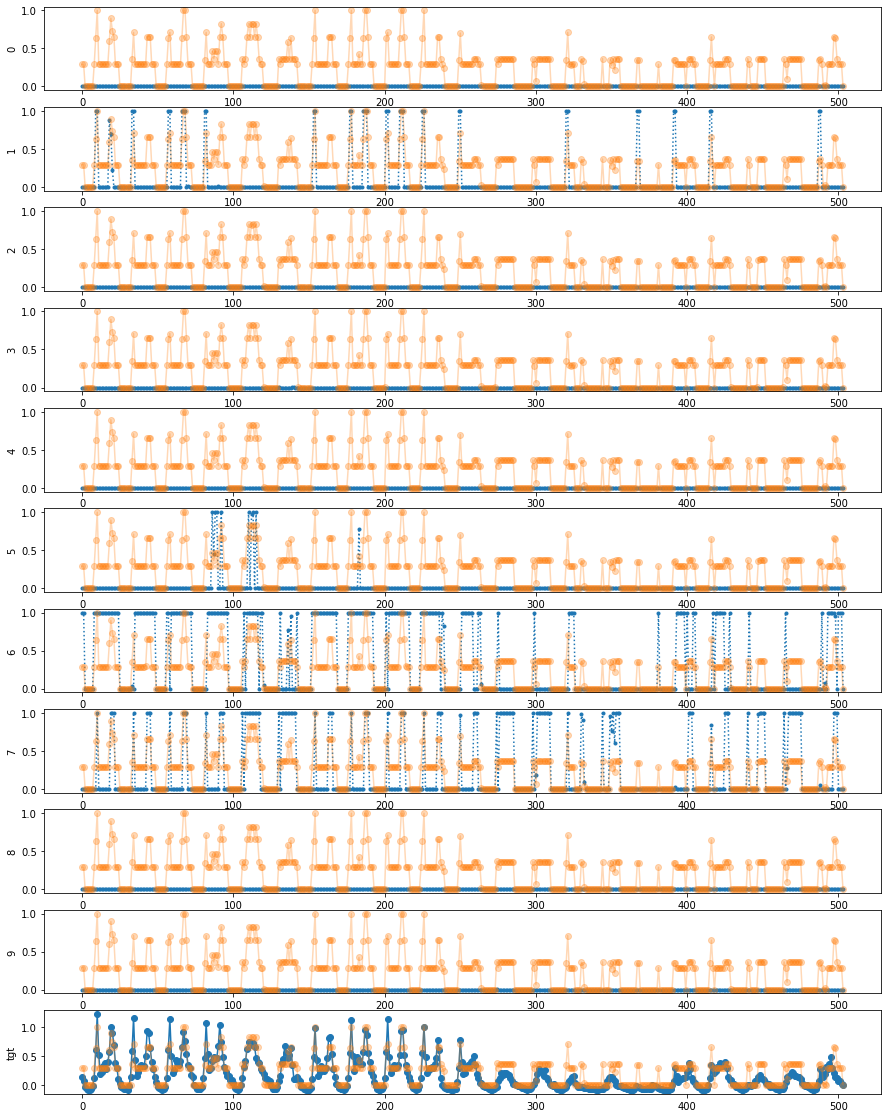

In [348]:
fig, ax = plt.subplots(11, figsize = (15, 20))
for i in range(10):
    ax[i].plot(h_rslt_1[:,i], '.:', label = i)
    ax[i].plot((predar_m1y0_test - min(predar_m1y0_test))/(max(predar_m1y0_test)-min(predar_m1y0_test)),
               'o-',
               label='pred',
               alpha=0.3)
    ax[i].set_ylabel(i)


ax[10].plot((tgt_data_test - min(predar_m1y0_test))/(max(predar_m1y0_test)-min(predar_m1y0_test)),'o-',label='tgt')    
ax[10].plot((predar_m1y0_test - min(predar_m1y0_test))/(max(predar_m1y0_test)-min(predar_m1y0_test)),
            'o-',
            label='pred',
            alpha=0.3)
ax[10].set_ylabel('tgt')
#ax.set_xlim(right=len(predar_m1y0_test))
#ax.legend()

#plt.ylabel('Normalized Values')
#plt.show()

only neuron 1,5,6,7 are active

In [345]:
dict_y01['stack.0.bias']

Parameter containing:
tensor([ -38.4627, -160.7807,  -20.4367,  -19.5354,  -17.9153,  -44.2041,
         -53.4498,   -9.7021,  -81.1548,  -26.2099], requires_grad=True)

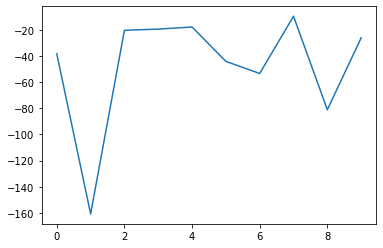

In [344]:
plt.plot(dict_y01['stack.0.bias'].detach().numpy())

all the neurons has large negative input, so most neurons are mostly inactive.

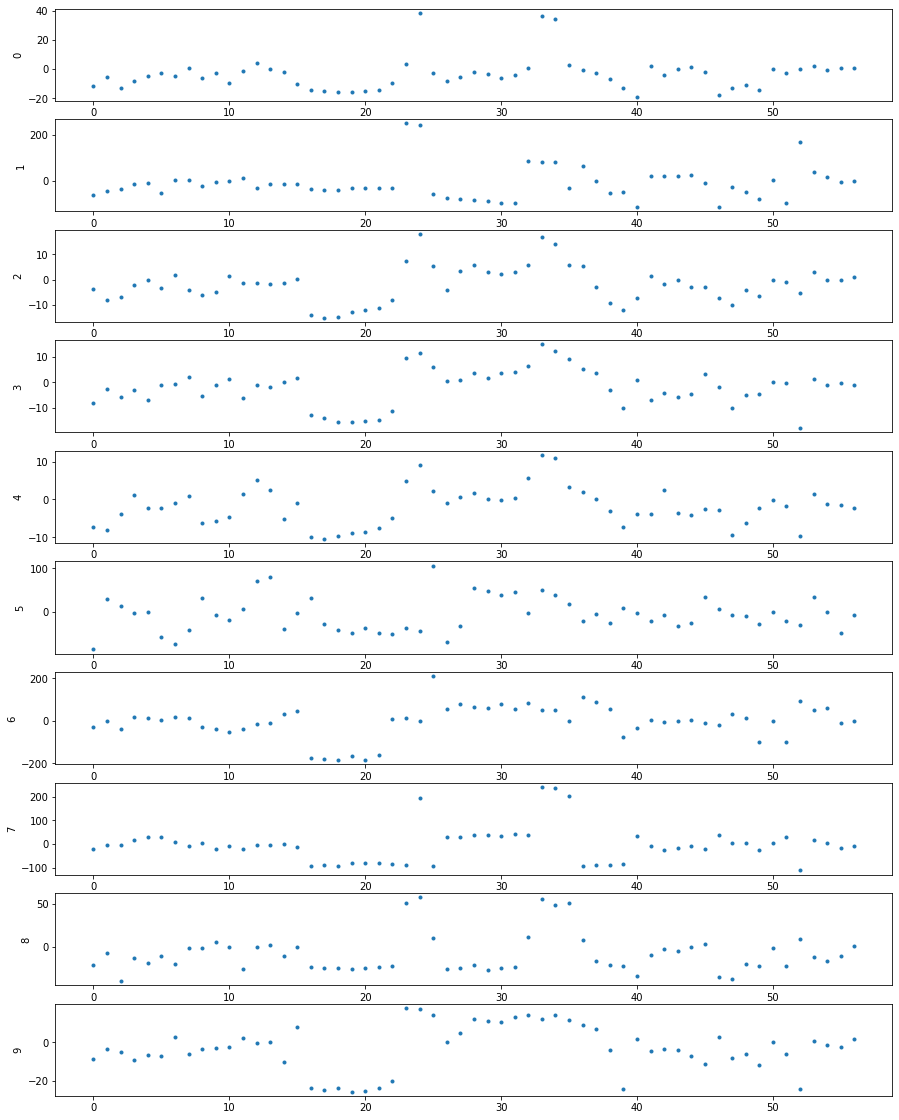

In [350]:
w = dict_y01['stack.0.weight'].detach().numpy()
fig, ax = plt.subplots(10, figsize = (15, 20))
for i in range(10):
    ax[i].plot(w[i,:], '.', label = i)
    ax[i].set_ylabel(i)

1,5,6,7 has stronger input weight to overcome the strong minus bias